<a href="https://colab.research.google.com/github/smgoldfish/ML-Assignment-2/blob/main/Classification_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#DataPreprocessing :

### **Intake :**

Scrapping Data -

In [ ]:
!pip install sodapy
from sodapy import Socrata

client = Socrata("data.austintexas.gov", None)
results = client.get("wter-evkm", limit=200000)

In [ ]:
import pandas as pd
intake=pd.DataFrame(results)

In [ ]:
intake.head(2)

,animal_id,name,datetime,datetime2,found_location,intake_type,intake_condition,animal_type,sex_upon_intake,age_upon_intake,breed,color
0,A786884,*Brock,2019-01-03T16:19:00.000,2019-01-03T16:19:00.000,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,2 years,Beagle Mix,Tricolor
1,A706918,Belle,2015-07-05T12:59:00.000,2015-07-05T12:59:00.000,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,8 years,English Springer Spaniel,White/Liver


Converting Age in years and months to days :

In [ ]:
import re

def age_to_days(age_str):
    total_days = 0
    year_pattern = re.compile(r'(\d+)\s*year[s]?')
    month_pattern = re.compile(r'(\d+)\s*month[s]?')
    day_pattern = re.compile(r'(\d+)\s*day[s]?')


    years = year_pattern.search(age_str)
    if years:
        total_days += int(years.group(1)) * 365


    months = month_pattern.search(age_str)
    if months:
        total_days += int(months.group(1)) * 30


    days = day_pattern.search(age_str)
    if days:
        total_days += int(days.group(1))

    return total_days


intake['age_in_days'] = intake['age_upon_intake'].apply(age_to_days)

intake.head(2)

,animal_id,name,datetime,datetime2,found_location,intake_type,intake_condition,animal_type,sex_upon_intake,age_upon_intake,breed,color,age_in_days
0,A786884,*Brock,2019-01-03T16:19:00.000,2019-01-03T16:19:00.000,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,2 years,Beagle Mix,Tricolor,730
1,A706918,Belle,2015-07-05T12:59:00.000,2015-07-05T12:59:00.000,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,8 years,English Springer Spaniel,White/Liver,2920


Removing duplicate values :

In [ ]:
dupl = intake[intake.duplicated(subset=['animal_id'], keep=False)]
dupl

,animal_id,name,datetime,datetime2,found_location,intake_type,intake_condition,animal_type,sex_upon_intake,age_upon_intake,breed,color,age_in_days
12,A731435,*Casey,2016-08-08T17:52:00.000,2016-08-08T17:52:00.000,Austin (TX),Owner Surrender,Normal,Cat,Neutered Male,5 months,Domestic Shorthair Mix,Cream Tabby,150
22,A841760,Duke,2022-03-30T09:27:00.000,2022-03-30T09:27:00.000,512 Bowery Trl in Austin (TX),Stray,Injured,Dog,Neutered Male,4 years,Beagle,Tricolor,1460
30,A754715,Rheia,2019-07-29T17:19:00.000,2019-07-29T17:19:00.000,Austin (TX),Owner Surrender,Normal,Dog,Spayed Female,2 years,Labrador Retriever Mix,Black/White,730
38,A845340,Koda,2023-02-21T15:26:00.000,2023-02-21T15:26:00.000,Ih 35 And Hwy 71 in Austin (TX),Stray,Normal,Dog,Intact Male,2 years,Siberian Husky,Gray/White,730
43,A696205,Roo,2015-02-12T11:57:00.000,2015-02-12T11:57:00.000,Austin (TX),Owner Surrender,Normal,Cat,Spayed Female,2 years,Domestic Shorthair Mix,Black,730
...,...,...,...,...,...,...,...,...,...,...,...,...,...
168055,A833759,Cowboy,2024-10-18T18:44:00.000,2024-10-18T18:44:00.000,1809 E 39Th St in Austin (TX),Public Assist,Normal,Dog,Neutered Male,10 years,Chihuahua Shorthair,Black/Tan,3650
168057,A913823,Maggie,2024-10-07T11:47:00.000,2024-10-07T11:47:00.000,Austin (TX),Owner Surrender,Normal,Dog,Intact Female,5 months,Siberian Husky Mix,Black/White,150
168082,A913823,Maggie,2024-10-19T11:47:00.000,2024-10-19T11:47:00.000,Austin (TX),Owner Surrender,Normal,Dog,Spayed Female,5 months,Siberian Husky Mix,Black/White,150
168083,A732161,Bobo,2024-10-19T12:58:00.000,2024-10-19T12:58:00.000,6110 Kasper St in Austin (TX),Owner Surrender,Injured,Dog,Intact Male,9 years,Pit Bull Mix,Brown/White,3285


In [ ]:
intake.drop_duplicates(subset=['animal_id'],inplace=True)
intake.shape

(151068, 13)

### **Out take:**

In [ ]:
client = Socrata("data.austintexas.gov", None)
result_1 = client.get("9t4d-g238", limit=200000)

In [ ]:
outtake=pd.DataFrame(result_1)

In [ ]:
outtake.head(4)

,animal_id,name,datetime,monthyear,date_of_birth,outcome_type,animal_type,sex_upon_outcome,age_upon_outcome,breed,color,outcome_subtype
0,A882831,*Hamilton,2023-07-01T18:12:00.000,2023-07-01T18:12:00.000,2023-03-25T00:00:00.000,Adoption,Cat,Neutered Male,3 months,Domestic Shorthair Mix,Black/White,NaN
1,A794011,Chunk,2019-05-08T18:20:00.000,2019-05-08T18:20:00.000,2017-05-02T00:00:00.000,Rto-Adopt,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White,NaN
2,A776359,Gizmo,2018-07-18T16:02:00.000,2018-07-18T16:02:00.000,2017-07-12T00:00:00.000,Adoption,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown,NaN
3,A821648,NaN,2020-08-16T11:38:00.000,2020-08-16T11:38:00.000,2019-08-16T00:00:00.000,Euthanasia,Other,Unknown,1 year,Raccoon,Gray,NaN


In [ ]:
outtake.shape

(168042, 12)

In [ ]:
outtake['age_in_days_o'] = outtake['age_upon_outcome'].apply(age_to_days)

In [ ]:
outtake.head(2)

,animal_id,name,datetime,monthyear,date_of_birth,outcome_type,animal_type,sex_upon_outcome,age_upon_outcome,breed,color,outcome_subtype,age_in_days_o
0,A882831,*Hamilton,2023-07-01T18:12:00.000,2023-07-01T18:12:00.000,2023-03-25T00:00:00.000,Adoption,Cat,Neutered Male,3 months,Domestic Shorthair Mix,Black/White,NaN,90
1,A794011,Chunk,2019-05-08T18:20:00.000,2019-05-08T18:20:00.000,2017-05-02T00:00:00.000,Rto-Adopt,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White,NaN,730


In [ ]:
dupl = outtake[outtake.duplicated(subset=['animal_id'], keep=False)]
dupl

,animal_id,name,datetime,monthyear,date_of_birth,outcome_type,animal_type,sex_upon_outcome,age_upon_outcome,breed,color,outcome_subtype,age_in_days_o
4,A720371,Moose,2016-02-13T17:59:00.000,2016-02-13T17:59:00.000,2015-10-08T00:00:00.000,Adoption,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff,NaN,120
6,A659412,Princess,2020-10-05T14:37:00.000,2020-10-05T14:37:00.000,2013-03-24T00:00:00.000,Adoption,Dog,Spayed Female,7 years,Chihuahua Shorthair Mix,Brown,NaN,2555
16,A818049,Fiona,2020-06-01T13:24:00.000,2020-06-01T13:24:00.000,2018-06-01T00:00:00.000,Return to Owner,Dog,Intact Female,2 years,Pit Bull,White/Blue,NaN,730
21,A698049,Luigi,2015-03-16T14:50:00.000,2015-03-16T14:50:00.000,2014-06-05T00:00:00.000,Transfer,Cat,Spayed Female,9 months,Domestic Medium Hair Mix,Black/White,Partner,270
30,A835990,Jack,2021-06-04T14:31:00.000,2021-06-04T14:31:00.000,2019-06-04T00:00:00.000,Return to Owner,Dog,Intact Male,2 years,Weimaraner/Labrador Retriever,Blue,NaN,730
...,...,...,...,...,...,...,...,...,...,...,...,...,...
167991,A909840,Sassy,2024-10-18T14:16:00.000,2024-10-18T14:16:00.000,2023-01-22T00:00:00.000,Return to Owner,Dog,Intact Female,1 year,Dachshund/Chihuahua Shorthair,Tricolor,NaN,365
168005,A792577,Legend,2024-10-18T17:08:00.000,2024-10-18T17:08:00.000,2017-04-12T00:00:00.000,Adoption,Dog,Neutered Male,7 years,Pit Bull Mix,Tan/White,NaN,2555
168007,A913366,Nala,2024-10-18T17:10:00.000,2024-10-18T17:10:00.000,2024-07-15T00:00:00.000,Adoption,Dog,Spayed Female,3 months,Pit Bull,Fawn/White,NaN,90
168034,A716432,Zelda,2024-10-19T16:43:00.000,2024-10-19T16:43:00.000,2015-05-19T00:00:00.000,Adoption,Dog,Spayed Female,9 years,Catahoula Mix,Blue Merle/Black,NaN,3285


In [ ]:
outtake.drop_duplicates(subset=['animal_id'],inplace=True)
outtake.shape

(151004, 13)

***Merging the Intake and Outtake dataframes :***

In [ ]:
df= pd.merge(intake, outtake, on='animal_id', how='inner')
print(df.shape)
df.head()

(150190, 25)


,animal_id,name_x,datetime_x,datetime2,found_location,intake_type,intake_condition,animal_type_x,sex_upon_intake,age_upon_intake,...,monthyear,date_of_birth,outcome_type,animal_type_y,sex_upon_outcome,age_upon_outcome,breed_y,color_y,outcome_subtype,age_in_days_o
0,A786884,*Brock,2019-01-03T16:19:00.000,2019-01-03T16:19:00.000,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,2 years,...,2019-01-08T15:11:00.000,2017-01-03T00:00:00.000,Transfer,Dog,Neutered Male,2 years,Beagle Mix,Tricolor,Partner,730
1,A706918,Belle,2015-07-05T12:59:00.000,2015-07-05T12:59:00.000,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,8 years,...,2015-07-05T15:13:00.000,2007-07-05T00:00:00.000,Return to Owner,Dog,Spayed Female,8 years,English Springer Spaniel,White/Liver,NaN,2920
2,A724273,Runster,2016-04-14T18:43:00.000,2016-04-14T18:43:00.000,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,Intact Male,11 months,...,2016-04-21T17:17:00.000,2015-04-17T00:00:00.000,Return to Owner,Dog,Neutered Male,1 year,Basenji Mix,Sable/White,NaN,365
3,A665644,NaN,2013-10-21T07:59:00.000,2013-10-21T07:59:00.000,Austin (TX),Stray,Sick,Cat,Intact Female,4 weeks,...,2013-10-21T11:39:00.000,2013-09-21T00:00:00.000,Transfer,Cat,Intact Female,4 weeks,Domestic Shorthair Mix,Calico,Partner,0
4,A857105,Johnny Ringo,2022-05-12T00:23:00.000,2022-05-12T00:23:00.000,4404 Sarasota Drive in Austin (TX),Public Assist,Normal,Cat,Neutered Male,2 years,...,2022-05-12T14:35:00.000,2020-05-12T00:00:00.000,Transfer,Cat,Neutered Male,2 years,Domestic Shorthair,Orange Tabby,Partner,730


In [ ]:
df.head(2)

,animal_id,name_x,datetime_x,datetime2,found_location,intake_type,intake_condition,animal_type_x,sex_upon_intake,age_upon_intake,...,monthyear,date_of_birth,outcome_type,animal_type_y,sex_upon_outcome,age_upon_outcome,breed_y,color_y,outcome_subtype,age_in_days_o
0,A786884,*Brock,2019-01-03T16:19:00.000,2019-01-03T16:19:00.000,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,2 years,...,2019-01-08T15:11:00.000,2017-01-03T00:00:00.000,Transfer,Dog,Neutered Male,2 years,Beagle Mix,Tricolor,Partner,730
1,A706918,Belle,2015-07-05T12:59:00.000,2015-07-05T12:59:00.000,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,8 years,...,2015-07-05T15:13:00.000,2007-07-05T00:00:00.000,Return to Owner,Dog,Spayed Female,8 years,English Springer Spaniel,White/Liver,NaN,2920


In [ ]:
df.columns

Index(['animal_id', 'name_x', 'datetime_x', 'datetime2', 'found_location',
       'intake_type', 'intake_condition', 'animal_type_x', 'sex_upon_intake',
       'age_upon_intake', 'breed_x', 'color_x', 'age_in_days', 'name_y',
       'datetime_y', 'monthyear', 'date_of_birth', 'outcome_type',
       'animal_type_y', 'sex_upon_outcome', 'age_upon_outcome', 'breed_y',
       'color_y', 'outcome_subtype', 'age_in_days_o'],
      dtype='object')

Dropping unnecessary columns :

In [ ]:
df.drop(columns=['datetime2','found_location','name_y','animal_type_y','breed_y','color_y','outcome_subtype','age_upon_intake','age_upon_outcome'],inplace=True)

In [ ]:
df.drop(columns=['monthyear','date_of_birth','sex_upon_outcome'],inplace=True)

In [ ]:
df['intake_condition'].value_counts()

,count
intake_condition,
Normal,125996
Injured,9666
Sick,7330
Nursing,3822
Neonatal,1690
Aged,476
Medical,422
Other,327
Pregnant,144


In [ ]:
df['intake_condition'].replace({'Sick':'Medical','Med Attn':'Medical','Med Urgent':'Medical','Neurologic':'Medical','Parvo':'Medical','Agonal':'Medical','Panleuk':'Medical','Congenital':'Medical','Unknown':'Other','Space':'Other'},inplace=True)

<ipython-input-125-bb89be25d67d>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['intake_condition'].replace({'Sick':'Medical','Med Attn':'Medical','Med Urgent':'Medical','Neurologic':'Medical','Parvo':'Medical','Agonal':'Medical','Panleuk':'Medical','Congenital':'Medical','Unknown':'Other','Space':'Other'},inplace=True)


In [ ]:
df['intake_condition'].value_counts()

,count
intake_condition,
Normal,125996
Injured,9666
Medical,7846
Nursing,3822
Neonatal,1690
Aged,476
Other,355
Pregnant,144
Feral,138


In [ ]:
df['intake_type'].value_counts()

,count
intake_type,
Stray,105731
Owner Surrender,27935
Public Assist,8352
Wildlife,6301
Abandoned,1621
Euthanasia Request,250


In [ ]:
df['animal_type_x'].value_counts()

,count
animal_type_x,
Dog,77387
Cat,63274
Other,8653
Bird,847
Livestock,29


In [ ]:
df['sex_upon_intake'].value_counts()

,count
sex_upon_intake,
Intact Male,52973
Intact Female,51665
Neutered Male,17481
Spayed Female,15040
Unknown,13029
NULL,2


In [ ]:
df['sex_upon_intake'].replace({'NULL':'Unknown'},inplace=True)

<ipython-input-130-96db9052df27>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['sex_upon_intake'].replace({'NULL':'Unknown'},inplace=True)


In [ ]:
df['sex_upon_intake'].value_counts()

,count
sex_upon_intake,
Intact Male,52973
Intact Female,51665
Neutered Male,17481
Spayed Female,15040
Unknown,13031


In [ ]:
df['outcome_type'].value_counts()

,count
outcome_type,
Adoption,70944
Transfer,45469
Return to Owner,20052
Euthanasia,10253
Died,1571
Rto-Adopt,924
Disposal,831
Missing,77
Relocate,26


In [ ]:
df['outcome_type'].replace({'Lost':'Other','Stolen':'Other','Relocate':'Other','Missing':'Other','Disposal':'Other','Return to Owner':'Adoption','Rto-Adopt':'Adoption'},inplace=True)

<ipython-input-133-66a2e0110f74>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['outcome_type'].replace({'Lost':'Other','Stolen':'Other','Relocate':'Other','Missing':'Other','Disposal':'Other','Return to Owner':'Adoption','Rto-Adopt':'Adoption'},inplace=True)


In [ ]:
df['outcome_type'].value_counts()

,count
outcome_type,
Adoption,91920
Transfer,45469
Euthanasia,10253
Died,1571
Other,941


Converting Date column to appropiate format :

In [ ]:
df['datetime_x'] = df['datetime_x'].str.split('T').str[0]


In [ ]:
df['datetime_y']=df['datetime_y'].str.split('T').str[0]

Renaming the columns :

In [ ]:
df.rename(columns={
    'animal_id': 'Animal_ID',
    'datetime_x': 'Intake_Date',
    'intake_type': 'Intake_Type',
    'intake_condition': 'Intake_Condition',
    'animal_type_x': 'Animal_Type',
    'breed_x': 'Breed',
    'color_x': 'Color',
    'sex_upon_intake': 'Sex_Upon_Intake',
    'name_x': 'Animal_Name',
    'datetime_y': 'Outcome_Date',
    'outcome_type': 'Outcome_Type',
    'age_in_days':'intake_age',
    'age_in_days_o':'outcome_age'
}, inplace=True)
df.head(2)


,Animal_ID,Animal_Name,Intake_Date,Intake_Type,Intake_Condition,Animal_Type,Sex_Upon_Intake,Breed,Color,intake_age,Outcome_Date,Outcome_Type,outcome_age
0,A786884,*Brock,2019-01-03,Stray,Normal,Dog,Neutered Male,Beagle Mix,Tricolor,730,2019-01-08,Transfer,730
1,A706918,Belle,2015-07-05,Stray,Normal,Dog,Spayed Female,English Springer Spaniel,White/Liver,2920,2015-07-05,Adoption,2920


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150190 entries, 0 to 150189
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal_ID         150190 non-null  object
 1   Animal_Name       102473 non-null  object
 2   Intake_Date       150190 non-null  object
 3   Intake_Type       150190 non-null  object
 4   Intake_Condition  150190 non-null  object
 5   Animal_Type       150190 non-null  object
 6   Sex_Upon_Intake   150190 non-null  object
 7   Breed             150190 non-null  object
 8   Color             150190 non-null  object
 9   intake_age        150190 non-null  int64 
 10  Outcome_Date      150190 non-null  object
 11  Outcome_Type      150154 non-null  object
 12  outcome_age       150190 non-null  int64 
dtypes: int64(2), object(11)
memory usage: 14.9+ MB


Converting intake date and outtake date into a more meaningful column :

In [ ]:
df['Intake_Date'] = pd.to_datetime(df['Intake_Date'])
df['Outcome_Date'] = pd.to_datetime(df['Outcome_Date'])


df['Days_in_Shelter'] = (df['Outcome_Date'] - df['Intake_Date']).dt.days

df.head(2)

,Animal_ID,Animal_Name,Intake_Date,Intake_Type,Intake_Condition,Animal_Type,Sex_Upon_Intake,Breed,Color,intake_age,Outcome_Date,Outcome_Type,outcome_age,Days_in_Shelter
0,A786884,*Brock,2019-01-03,Stray,Normal,Dog,Neutered Male,Beagle Mix,Tricolor,730,2019-01-08,Transfer,730,5
1,A706918,Belle,2015-07-05,Stray,Normal,Dog,Spayed Female,English Springer Spaniel,White/Liver,2920,2015-07-05,Adoption,2920,0


In [ ]:
df.isnull().sum()

,0
Animal_ID,0
Animal_Name,47717
Intake_Date,0
Intake_Type,0
Intake_Condition,0
Animal_Type,0
Sex_Upon_Intake,0
Breed,0
Color,0
intake_age,0


In [ ]:
df.drop(columns={'Animal_Name'},inplace=True)

As the null values are less than 30% , we can remove those directly as per standard rule :

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

,0
Animal_ID,0
Intake_Date,0
Intake_Type,0
Intake_Condition,0
Animal_Type,0
Sex_Upon_Intake,0
Breed,0
Color,0
intake_age,0
Outcome_Date,0


In [ ]:
df['Sex_Upon_Intake'].value_counts()

,count
Sex_Upon_Intake,
Intact Male,52964
Intact Female,51655
Neutered Male,17479
Spayed Female,15037
Unknown,13019


In [ ]:
df.drop(columns={'Intake_Date','Outcome_Date','Animal_ID','Color','outcome_age'},inplace=True)

In [ ]:
df['Days_in_Shelter'].value_counts()

,count
Days_in_Shelter,
0,19707
4,15381
1,14008
5,9060
2,6690
...,...
-920,1
-1290,1
-686,1


Removing those rows wherein we have days in shelter in negative as practically thats not possible.

In [ ]:
df = df[df['Days_in_Shelter'] >= 0]

#EDA :

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146595 entries, 0 to 150189
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Intake_Type       146595 non-null  object
 1   Intake_Condition  146595 non-null  object
 2   Animal_Type       146595 non-null  object
 3   Sex_Upon_Intake   146595 non-null  object
 4   Breed             146595 non-null  object
 5   intake_age        146595 non-null  int64 
 6   Outcome_Type      146595 non-null  object
 7   Days_in_Shelter   146595 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 10.1+ MB


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

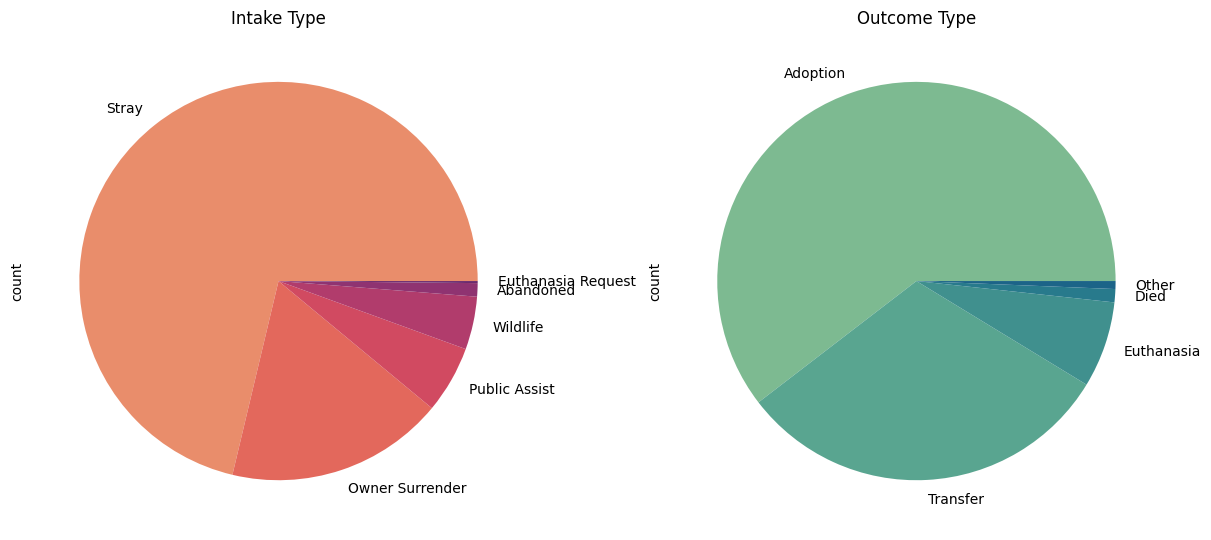

In [ ]:
intake_colors = sns.color_palette("flare")
outcome_colors = sns.color_palette("crest")

fig, axes = plt.subplots(1, 2, figsize=(12, 6), layout="constrained")

# Intake_Type
df['Intake_Type'].value_counts().plot(kind='pie', ax=axes[0], colors=intake_colors)
axes[0].set_title('Intake Type')

# Outcome_Type
df['Outcome_Type'].value_counts().plot(kind='pie', ax=axes[1], colors=outcome_colors)
axes[1].set_title('Outcome Type')

plt.show()

*The pie charts reveal that **Stray** animals are the most common intake type, while **Adoption** and **Transfer** is the most frequent outcome.*

<ipython-input-152-341948cfea9f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=animal_counts.index, y=animal_counts.values, palette="pastel")


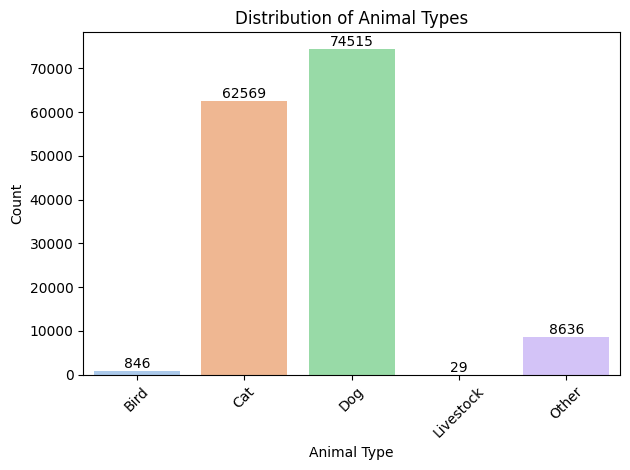

In [ ]:
desired_order = ['Bird', 'Cat', 'Dog', 'Livestock', 'Other']

animal_counts = df['Animal_Type'].value_counts()
animal_counts = animal_counts.reindex(desired_order)

sns.barplot(x=animal_counts.index, y=animal_counts.values, palette="pastel")
for bar, label in zip(plt.gca().patches, animal_counts):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 5, label, ha='center', va='bottom')

plt.title('Distribution of Animal Types')
plt.xlabel('Animal Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

*The **bar chart** illustrates the distribution of **animal types** within the dataset. **Dogs** and **Cats** are the most prevalent types, followed by **Other** animals. **Birds** and **Livestock** represent significantly smaller proportions of the population.*

<ipython-input-153-af1d15a4d20b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_days_in_shelter.index, y=average_days_in_shelter.values, palette='pastel')


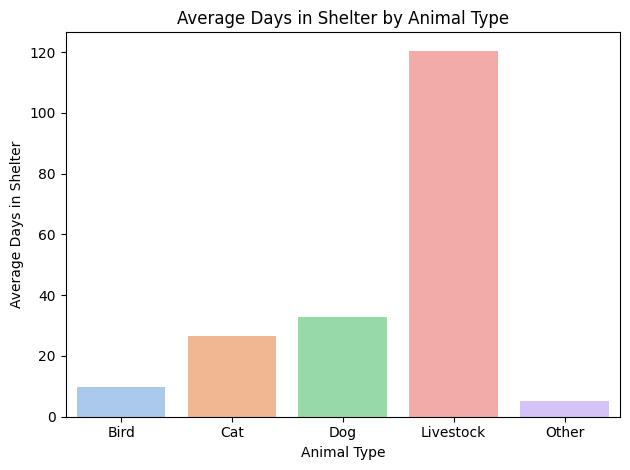

In [ ]:
average_days_in_shelter = df.groupby('Animal_Type')['Days_in_Shelter'].mean()
average_days_in_shelter = average_days_in_shelter.reindex(desired_order)

sns.barplot(x=average_days_in_shelter.index, y=average_days_in_shelter.values, palette='pastel')
plt.title('Average Days in Shelter by Animal Type')
plt.xlabel('Animal Type')
plt.ylabel('Average Days in Shelter')
plt.tight_layout()
plt.show()

 *The bar chart illustrates the average days spent in the shelter for different animal types. **Livestock**, in particular, stands out with a significantly **higher average stay** compared to other animals. This suggests that livestock might face unique challenges or require specialized care, leading to longer shelter stays.*

<ipython-input-154-6fd98e2417e6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome_Type', y='intake_age', data=df, palette='pastel')


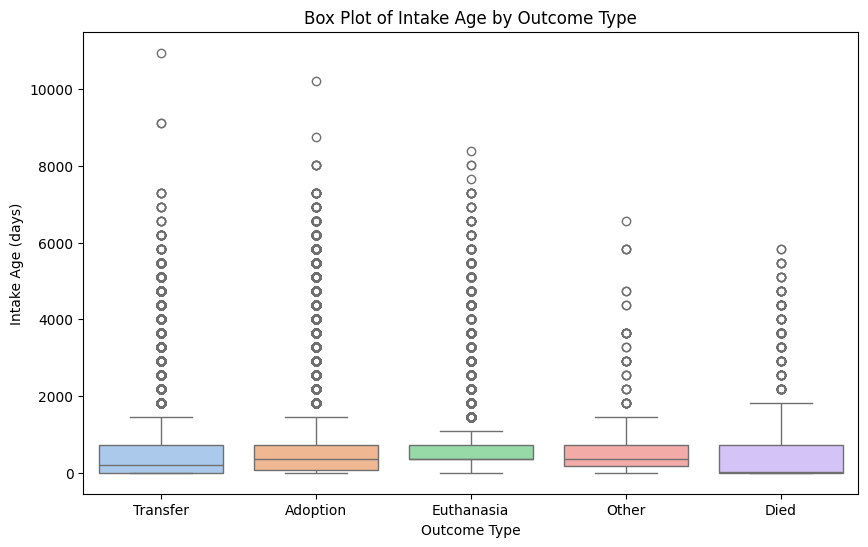

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Outcome_Type', y='intake_age', data=df, palette='pastel')
plt.title('Box Plot of Intake Age by Outcome Type')
plt.xlabel('Outcome Type')
plt.ylabel('Intake Age (days)')
plt.show()

*Here, we can observe that animals **adopted** tend to have a **lower median intake age** compared to other outcomes.*

*The **Transfer** category has a **relatively high median** intake age.*

*Additionally, the boxplot reveals the presence of **outliers** in several categories, particularly **Adoption** and **Other**, suggesting that some animals remain in the shelter for extended periods before reaching their final outcome.*

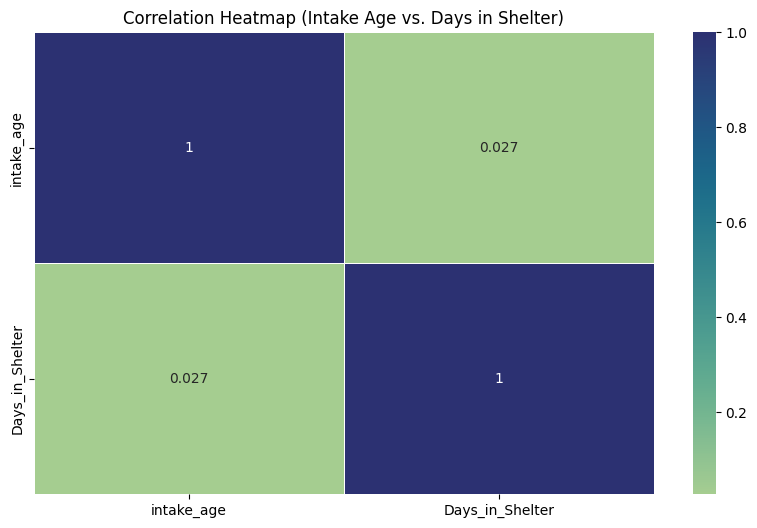

In [ ]:
plt.figure(figsize=(10, 6))
corr_matrix = df[['intake_age', 'Days_in_Shelter']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='crest', linewidths=0.5)
plt.title('Correlation Heatmap (Intake Age vs. Days in Shelter)')
plt.show()

*A **weak positive correlation** between **intake age** and **days in shelter** suggests a slight tendency for older animals to stay in the shelter longer than younger ones. Possible factors influencing this relationship might include:*

* **Health issues:** *Older animals might be more prone to health problems that require additional care or rehabilitation before they can be adopted.*
* **Shelter policies:** *Some shelters might prioritize younger animals for adoption due to their perceived appeal or potential for longer lifespans*

#Model Building :

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146595 entries, 0 to 150189
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Intake_Type       146595 non-null  object
 1   Intake_Condition  146595 non-null  object
 2   Animal_Type       146595 non-null  object
 3   Sex_Upon_Intake   146595 non-null  object
 4   Breed             146595 non-null  object
 5   intake_age        146595 non-null  int64 
 6   Outcome_Type      146595 non-null  object
 7   Days_in_Shelter   146595 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 10.1+ MB


In [ ]:
import pandas as pd
import pickle
from sklearn.preprocessing import LabelEncoder

categorical_columns = [col for col in df.columns if df[col].dtype == 'object']

#saving each label encoder for future use
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


    with open(f'{col}_encoder.pkl', 'wb') as f:
        pickle.dump(le, f)

In [ ]:
x=df.drop(columns={'Outcome_Type'})
y=df['Outcome_Type']

PIPELINE : RANDOMFOREST , LGBM , XGBOOST (TRAIN-VALIDATION)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score


X_train, X_temp, y_train, y_temp = train_test_split(x, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


param_grids = {
    'Random Forest': {
        'model__n_estimators': [50, 100, 200],
        'model__max_depth': [None, 10, 20, 30],
        'model__min_samples_split': [2, 5, 10],
        'model__min_samples_leaf': [1, 2, 4],
        'model__bootstrap': [True, False]
    },
    'LightGBM': {
        'model__num_leaves': [31, 50, 100],
        'model__learning_rate': [0.01, 0.1, 0.2],
        'model__n_estimators': [50, 100, 200],
        'model__max_depth': [-1, 10, 20]
    },
    'XGBoost': {
        'model__n_estimators': [50, 100, 200],
        'model__learning_rate': [0.01, 0.1, 0.2],
        'model__max_depth': [3, 6, 10],
        'model__gamma': [0, 1, 5],
        'model__colsample_bytree': [0.3, 0.7, 1.0]
    }
}


models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'LightGBM': LGBMClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, random_state=42)
}

best_models = {}


for model_name, model in models.items():
    print(f"\nTuning hyperparameters for {model_name}...\n")


    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])


    param_grid = param_grids[model_name]
    randomized_search = RandomizedSearchCV(
        pipeline,
        param_distributions=param_grid,
        n_iter=10,
        scoring='accuracy',
        refit=True,
        n_jobs=-1,
        random_state=42,
        verbose=2
    )


    randomized_search.fit(X_train, y_train)


    best_model = randomized_search.best_estimator_
    y_val_pred = best_model.predict(X_val)


    #PerformanceMetric
    accuracy_val = accuracy_score(y_val, y_val_pred)
    f1_val = f1_score(y_val, y_val_pred, average='weighted')
    precision_val = precision_score(y_val, y_val_pred, average='weighted')
    recall_val = recall_score(y_val, y_val_pred, average='weighted')

    print(f"\nPerformance on Validation Data for {model_name}:")
    print(f"Accuracy (Val): {accuracy_val:.4f}")
    print(f"F1 Score (Val): {f1_val:.4f}")
    print(f"Precision (Val): {precision_val:.4f}")
    print(f"Recall (Val): {recall_val:.4f}")


    best_models[model_name] = best_model



Tuning hyperparameters for Random Forest...

Fitting 5 folds for each of 10 candidates, totalling 50 fits

Performance on Validation Data for Random Forest:
Accuracy (Val): 0.7953
F1 Score (Val): 0.7767
Precision (Val): 0.7949
Recall (Val): 0.7953

Tuning hyperparameters for LightGBM...

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011030 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 582
[LightGBM] [Info] Number of data points in the train set: 117276, number of used features: 7
[LightGBM] [Info] Start training from score -0.502118
[LightGBM] [Info] Start training from score -4.512994
[LightGBM] [Info] Start training from score -2.662349
[LightGBM] [Info] Start training from score -5.058901
[LightGBM] [Info] Start training from score -1.178791

Performance on Validation 

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:17:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Performance on Validation Data for XGBoost:
Accuracy (Val): 0.7968
F1 Score (Val): 0.7787
Precision (Val): 0.7977
Recall (Val): 0.7968


TRAIN+VALIDATION->TEST:

In [ ]:
from sklearn.metrics import classification_report
import pandas as pd



X_train_val = pd.concat([pd.DataFrame(X_train), pd.DataFrame(X_val)])
y_train_val = pd.concat([pd.DataFrame(y_train), pd.DataFrame(y_val)])



for model_name, best_model in best_models.items():
    print(f"\nRetraining {model_name} on combined train+validation data...\n")
    best_model.fit(X_train_val, y_train_val)


    y_test_pred = best_model.predict(X_test)


    #PerformanceMetric
    accuracy_test = accuracy_score(y_test, y_test_pred)
    f1_test = f1_score(y_test, y_test_pred, average='weighted')
    precision_test = precision_score(y_test, y_test_pred, average='weighted')
    recall_test = recall_score(y_test, y_test_pred, average='weighted')


    print(f"\nPerformance on Test Data for {model_name}:")
    print(f"Accuracy (Test): {accuracy_test:.4f}")
    print(f"F1 Score (Test): {f1_test:.4f}")
    print(f"Precision (Test): {precision_test:.4f}")
    print(f"Recall (Test): {recall_test:.4f}")
    print(f"classification_report(test): {classification_report(y_test,y_test_pred)}")


Retraining Random Forest on combined train+validation data...



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)



Performance on Test Data for Random Forest:
Accuracy (Test): 0.7870
F1 Score (Test): 0.7678
Precision (Test): 0.7889
Recall (Test): 0.7870
classification_report(test):               precision    recall  f1-score   support

           0       0.78      0.96      0.86      8817
           1       0.71      0.04      0.07       138
           2       0.80      0.68      0.74      1014
           3       0.62      0.05      0.10        97
           4       0.81      0.52      0.63      4594

    accuracy                           0.79     14660
   macro avg       0.75      0.45      0.48     14660
weighted avg       0.79      0.79      0.77     14660


Retraining LightGBM on combined train+validation data...



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007918 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 582
[LightGBM] [Info] Number of data points in the train set: 131935, number of used features: 7
[LightGBM] [Info] Start training from score -0.503237
[LightGBM] [Info] Start training from score -4.522539
[LightGBM] [Info] Start training from score -2.658876
[LightGBM] [Info] Start training from score -5.053098
[LightGBM] [Info] Start training from score -1.177163

Performance on Test Data for LightGBM:
Accuracy (Test): 0.7885
F1 Score (Test): 0.7699
Precision (Test): 0.7875
Recall (Test): 0.7885
classification_report(test):               precision    recall  f1-score   support

           0       0.78      0.96      0.86      8817
           1       0.33      0.05      0.09       138
           2       0.81      0.68      0.74      10

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:24:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Performance on Test Data for XGBoost:
Accuracy (Test): 0.7887
F1 Score (Test): 0.7701
Precision (Test): 0.7901
Recall (Test): 0.7887
classification_report(test):               precision    recall  f1-score   support

           0       0.78      0.96      0.86      8817
           1       0.67      0.04      0.08       138
           2       0.81      0.68      0.74      1014
           3       0.67      0.08      0.15        97
           4       0.81      0.52      0.64      4594

    accuracy                           0.79     14660
   macro avg       0.75      0.46      0.49     14660
weighted avg       0.79      0.79      0.77     14660



In [ ]:
print(f"Best Model: {best_model}")

Best Model: Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=1.0, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=1, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.2,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=10, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=No

**XGBOOST is the best model**

**As the Accuracy was around 80% we tried using Stacking method , with the best hyperparameters we found above of xgboost , randomforest and lightgbm as base models and RandomForestClassifier as meta model.**

STACKING CLASSIFIER :

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score


estimators = [
    ('rf', best_models['Random Forest']),
    ('lgbm', best_models['LightGBM']),
    ('xgb', best_models['XGBoost'])
]


final_estimator = RandomForestClassifier(random_state=42)


stacking_clf = StackingClassifier(
    estimators=estimators,
    final_estimator=final_estimator,
    cv=5
)

stacking_clf.fit(X_train, y_train)
y_val_pred = stacking_clf.predict(X_val)


#PerformanceMetrics :
accuracy_test = accuracy_score(y_val, y_val_pred)
f1_test = f1_score(y_val, y_val_pred, average='weighted')
precision_test = precision_score(y_val, y_val_pred, average='weighted')
recall_test = recall_score(y_val, y_val_pred, average='weighted')


print(f"\nPerformance on validation Data with Stacking Classifier:")
print(f"Accuracy (Test): {accuracy_test:.4f}")
print(f"F1 Score (Test): {f1_test:.4f}")
print(f"Precision (Test): {precision_test:.4f}")
print(f"Recall (Test): {recall_test:.4f}")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007003 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 582
[LightGBM] [Info] Number of data points in the train set: 117276, number of used features: 7
[LightGBM] [Info] Start training from score -0.502118
[LightGBM] [Info] Start training from score -4.512994
[LightGBM] [Info] Start training from score -2.662349
[LightGBM] [Info] Start training from score -5.058901
[LightGBM] [Info] Start training from score -1.178791


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:58:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005839 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 582
[LightGBM] [Info] Number of data points in the train set: 93820, number of used features: 7
[LightGBM] [Info] Start training from score -0.502123
[LightGBM] [Info] Start training from score -4.513763
[LightGBM] [Info] Start training from score -2.662218
[LightGBM] [Info] Start training from score -5.058893
[LightGBM] [Info] Start training from score -1.178783
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006147 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 582
[LightGBM] [Info] Number of data points in the train set: 93821, number of used features: 7
[LightGBM] [Info] Start trai

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [10:00:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [10:00:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [10:00:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [10:01:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [10:01:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e


Performance on Test Data with Stacking Classifier:
Accuracy (Test): 0.7956
F1 Score (Test): 0.7790
Precision (Test): 0.7949
Recall (Test): 0.7956


TRAIN+VALIDATION -> TEST (STACKING):

In [ ]:
X_train_val = pd.concat([pd.DataFrame(X_train), pd.DataFrame(X_val)])
y_train_val = pd.concat([pd.DataFrame(y_train), pd.DataFrame(y_val)])



stacking_clf.fit(X_train_val, y_train_val)
y_test_pred = stacking_clf.predict(X_test)


#Performance_Metrics
accuracy_test = accuracy_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred, average='weighted')
precision_test = precision_score(y_test, y_test_pred, average='weighted')
recall_test = recall_score(y_test, y_test_pred, average='weighted')


print(f"\nPerformance on Test Data for stacking classifier:")
print(f"Accuracy (Test): {accuracy_test:.4f}")
print(f"F1 Score (Test): {f1_test:.4f}")
print(f"Precision (Test): {precision_test:.4f}")
print(f"Recall (Test): {recall_test:.4f}")
print(f"classification_report(test): {classification_report(y_test,y_test_pred)}")

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008434 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 582
[LightGBM] [Info] Number of data points in the train set: 131935, number of used features: 7
[LightGBM] [Info] Start training from score -0.503237
[LightGBM] [Info] Start training from score -4.522539
[LightGBM] [Info] Start training from score -2.658876
[LightGBM] [Info] Start training from score -5.053098
[LightGBM] [Info] Start training from score -1.177163


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [10:09:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006501 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 582
[LightGBM] [Info] Number of data points in the train set: 105548, number of used features: 7
[LightGBM] [Info] Start training from score -0.503240
[LightGBM] [Info] Start training from score -4.522888
[LightGBM] [Info] Start training from score -2.658903
[LightGBM] [Info] Start training from score -5.052208
[LightGBM] [Info] Start training from score -1.177157
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006375 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 582
[LightGBM] [Info] Number of data points in the train set: 105548, number of used features: 7
[LightGBM] [Info] Start tr

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [10:12:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [10:12:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [10:12:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [10:12:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [10:12:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e


Performance on Test Data for XGBoost:
Accuracy (Test): 0.7887
F1 Score (Test): 0.7718
Precision (Test): 0.7881
Recall (Test): 0.7887
classification_report(test):               precision    recall  f1-score   support

           0       0.79      0.95      0.86      8817
           1       0.62      0.07      0.13       138
           2       0.80      0.69      0.74      1014
           3       0.73      0.08      0.15        97
           4       0.80      0.54      0.64      4594

    accuracy                           0.79     14660
   macro avg       0.75      0.47      0.50     14660
weighted avg       0.79      0.79      0.77     14660



**The accuracy for stacking classifier comes out to be around 80 as well.**

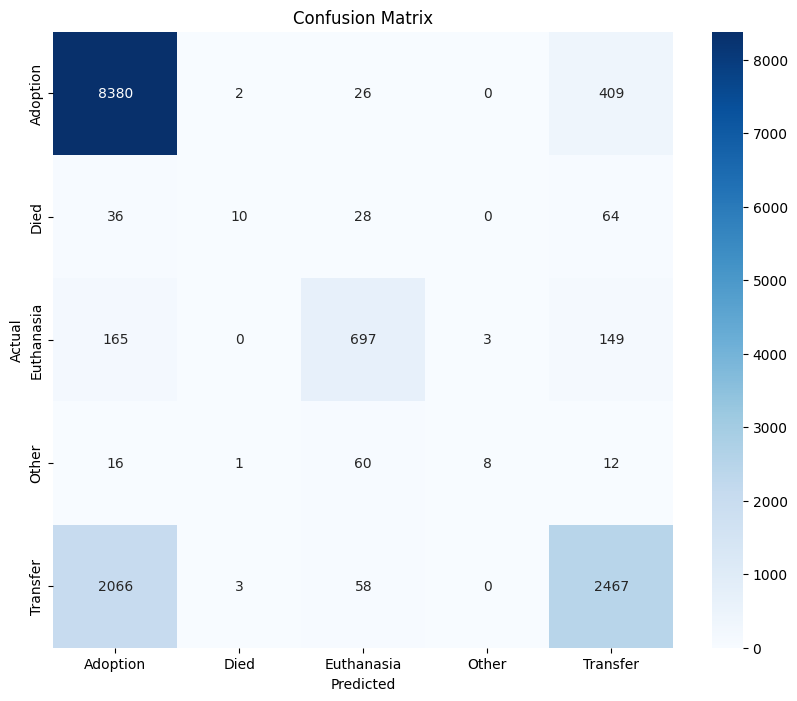

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=encoded_classes, yticklabels=encoded_classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

The confusion matrix shows that the model performs well in predicting Adoption and Transfer, but struggles with misclassifications between these two categories. There are also some errors in distinguishing between smaller categories like Died and Euthanasia.

**OneVsRest over Stacking**

In [ ]:
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import xgboost as xgb
import numpy as np


num_classes = len(np.unique(y_train))
best_models['XGBoost'] = xgb.XGBClassifier(objective='multi:softmax', num_class=num_classes, random_state=42)


estimators = [
    ('rf', best_models['Random Forest']),
    ('lgbm', best_models['LightGBM']),
    ('xgb', best_models['XGBoost'])
]


final_estimator = RandomForestClassifier(random_state=42)

stacking_clf = StackingClassifier(
    estimators=estimators,
    final_estimator=final_estimator,
    cv=5
)

ovr_stacking_clf = OneVsRestClassifier(stacking_clf)
ovr_stacking_clf.fit(X_train, y_train)
y_val_pred = ovr_stacking_clf.predict(X_val)

#Performance Metrics :
accuracy_test = accuracy_score(y_val, y_val_pred)
f1_test = f1_score(y_val, y_val_pred, average='weighted')
precision_test = precision_score(y_val, y_val_pred, average='weighted')
recall_test = recall_score(y_val, y_val_pred, average='weighted')

print(f"\nPerformance on validation Data with One-vs-Rest Stacking Classifier:")
print(f"Accuracy (Test): {accuracy_test:.4f}")
print(f"F1 Score (Test): {f1_test:.4f}")
print(f"Precision (Test): {precision_test:.4f}")
print(f"Recall (Test): {recall_test:.4f}")

[LightGBM] [Info] Number of positive: 70981, number of negative: 46295
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007403 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 582
[LightGBM] [Info] Number of data points in the train set: 117276, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.605247 -> initscore=0.427378
[LightGBM] [Info] Start training from score 0.427378
[LightGBM] [Info] Number of positive: 56784, number of negative: 37036
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006296 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 582
[LightGBM] [Info] Number of data points in the train set: 93820, number of used features: 7
[LightGBM] [Info] [bina

**We tried wrapping ove vs rest method over the StackingClassifier but the result stayed the same,
Accuracy (Test): 0.7941
F1 Score (Test): 0.7769
Precision (Test): 0.7920
Recall (Test): 0.7941**

In [ ]:
encoded_classes = le.classes_

for i, class_label in enumerate(encoded_classes):
    print(f"{i} -> {class_label}")

0 -> Adoption
1 -> Died
2 -> Euthanasia
3 -> Other
4 -> Transfer


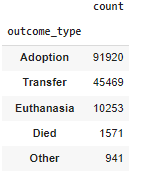

**The possible reason for accuracy being 80% could be the data imbalance we have.
We tried resolving this as well by using smote , ADASYN , undersampling+oversamppling as well but the model performed poorly on the resampled_x and resampled_y for all the three cases.**
